In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sys
import ipynb
import matplotlib.pyplot as plt
import ipynb.fs.full.HotDogImageHelper as img_helper


In [2]:
picture_location = os.path.expanduser("~/tmp/HotDogStuff/pictures/")
model_location = os.path.expanduser("~/tmp/HotDogStuff/model/hotdog_model.h5")
picture_size = 64
class_size = 5000

In [3]:
def kerasModel(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(16, kernel_size = (8,8), padding = 'valid', strides=(4,4), input_shape = input_shape, activation='relu'))
    model.add(tf.keras.layers.Convolution2D(32, kernel_size = (5,5), padding='same', strides=(2,2), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(64, kernel_size= (5,5), padding = 'same', strides = (2,2), activation = 'relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(512, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return (model)

def loadScaledImages(picture_location, picture_size, class_size):
    scaled_X, y = img_helper.loadData(picture_size, class_size,picture_location)
    n_classes = len(np.unique(y))
    print("Number of classes =", n_classes)
    scaled_X = img_helper.preprocessData(scaled_X)
    y = tf.keras.utils.to_categorical(y)

    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

    print("train shape X", X_train.shape)
    print("train shape y", y_train.shape)
    print("test shape X", y_train.shape)
    print("test shape y", y_test.shape)

    return scaled_X, y, X_train, X_test, y_train, y_test

def makeModel(picture_size, X_train, X_test, y_train, y_test):

    model = kerasModel([picture_size, picture_size, 1])
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(X_train, y_train, epochs = 20,verbose=1)
    label_binarizer = LabelBinarizer()
    y_one_hot_test = label_binarizer.fit_transform(y_test)


    metrics = model.evaluate(X_test, y_test)
    for metric_i in range(len(model.metrics_names)):
        metric_name = model.metrics_names[metric_i]
        metric_value = metrics[metric_i]
        print('{}: {}'.format(metric_name, metric_value))
    return(model)



In [4]:
##Load all the pictures
scaled_pictures, y, X_train, X_test, y_train, y_test = loadScaledImages(picture_location=picture_location, picture_size=picture_size, class_size=class_size)


There are 5000 hotdog images
There are 5000 not hotdog images
Number of classes = 2
train shape X (8000, 64, 64, 1)
train shape y (8000, 2)
test shape X (8000, 2)
test shape y (2000, 2)


In [11]:
#model  = makeModel(picture_size=picture_size,  X_train = X_train, X_test=X_test, y_train = y_train, y_test=y_test)
model = tf.keras.models.load_model(model_location)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 15, 15, 16)        1040      
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          51264     
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)              

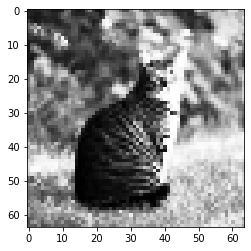

In [6]:
img_helper.showPostProcessedImage(scaled_pictures[5000])
plt.show()

[[1.0000000e+00 2.1815542e-10]]
Hot Dog!


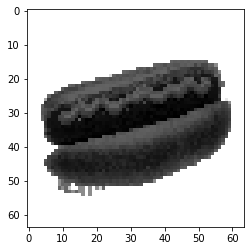

In [7]:
#hotdog imag
img_helper.makeIndependentPrediction("https://upload.wikimedia.org/wikipedia/commons/3/3a/NCI_Visuals_Food_Hot_Dog.jpg", model, picture_size) #hotdog
plt.show()

[[0.283946 0.716054]]
Not Hot Dog!


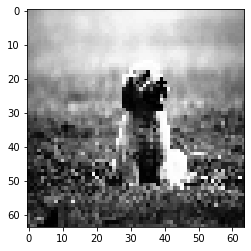

In [8]:
#Puppy
img_helper.makeIndependentPrediction("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg", model, picture_size)
plt.show()

[[0.00175384 0.9982462 ]]
Not Hot Dog!


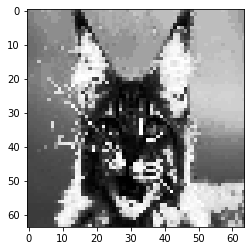

In [9]:
#cat
img_helper.makeIndependentPrediction("https://www.catster.com/wp-content/uploads/2017/08/A-fluffy-cat-looking-funny-surprised-or-concerned.jpg", model, picture_size)
plt.show()